# TP sur l'ACP en Python
Fait par Vincent LIU, traduction du TP en R de Fanny Villers.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv("../data/notes_ACP.txt", sep = " ")

## Analyse descriptive univariée et bi-variée des données.

In [3]:
data

,MATH,PHYS,FRAN,ANGL
jean,6.0,6.0,5.0,5.5
alan,8.0,8.0,8.0,8.0
anni,6.0,7.0,11.0,9.5
moni,14.5,14.5,15.5,15.0
didi,14.0,14.0,12.0,12.5
andr,11.0,10.0,5.5,7.0
pier,5.5,7.0,14.0,11.5
brig,13.0,12.5,8.5,9.5
evel,9.0,9.5,12.5,12.0


In [5]:
n, p = data.shape
names = list(data.index)
features = list(data.columns)
print("Il y a {} élèves notés dans {} matières.".format(n,p))
data.describe()

Il y a 9 élèves notés dans 4 matières.


,MATH,PHYS,FRAN,ANGL
count,9.000000,9.000000,9.000000,9.000000
mean,9.666667,9.833333,10.222222,10.055556
std,3.579455,3.172144,3.683673,2.983752
min,5.500000,6.000000,5.000000,5.500000
25%,6.000000,7.000000,8.000000,8.000000
50%,9.000000,9.500000,11.000000,9.500000
75%,13.000000,12.500000,12.500000,12.000000
max,14.500000,14.500000,15.500000,15.000000


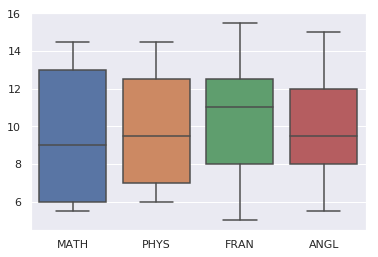

In [6]:
ax = sns.boxplot(data = data)

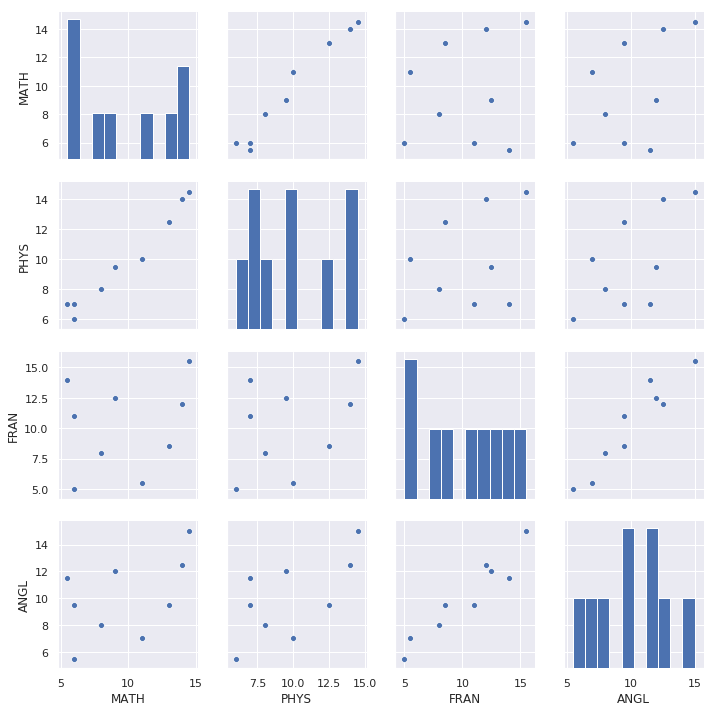

In [7]:
sns.pairplot(data)

La matrice de variance-covariance des $p$:
\begin{equation}
S = \begin{bmatrix}
s_1^2 & s_{12} & ... & s_{1p} \\
s_{21} & s_2^2 & ... & s_{2p} \\
... & ... & ... & ... \\
s_{p1} & s_{p2} & ... & s_p^2 
\end{bmatrix}
= \frac{1}{n} X^T X
\end{equation}
où $s_{jj'}$ est la covariance empirique entre les variables $x^j$ et $x^{j'}$.

In [8]:
data.cov()

,MATH,PHYS,FRAN,ANGL
MATH,12.812500,11.156250,2.989583,5.427083
PHYS,11.156250,10.062500,4.635417,6.166667
FRAN,2.989583,4.635417,13.569444,10.454861
ANGL,5.427083,6.166667,10.454861,8.902778


In [9]:
data.cov()*((n-1)/n)

,MATH,PHYS,FRAN,ANGL
MATH,11.388889,9.916667,2.657407,4.824074
PHYS,9.916667,8.944444,4.120370,5.481481
FRAN,2.657407,4.120370,12.061728,9.293210
ANGL,4.824074,5.481481,9.293210,7.913580


In [101]:
data.corr() # = data.cov lorsque data est réduit

,MATH,PHYS,FRAN,ANGL
MATH,1.000000,0.982536,0.226732,0.508144
PHYS,0.982536,1.000000,0.396693,0.651531
FRAN,0.226732,0.396693,1.000000,0.951206
ANGL,0.508144,0.651531,0.951206,1.000000


In [11]:
data.mean(0) # O Moyenne par matières

MATH     9.666667
PHYS     9.833333
FRAN    10.222222
ANGL    10.055556
dtype: float64

In [12]:
data.mean(1) # 1 Moyenne par élèves

jean     5.625
alan     8.000
anni     8.375
moni    14.875
didi    13.125
andr     8.375
pier     9.500
brig    10.875
evel    10.750
dtype: float64

In [13]:
data.var(0) * (n-1)/n # Variance par matières

MATH    11.388889
PHYS     8.944444
FRAN    12.061728
ANGL     7.913580
dtype: float64

## ACP à la main

In [14]:
# On centre les données
X = preprocessing.StandardScaler(with_std=False).fit_transform(data) # with_std=False: on ne réduit pas

In [15]:
# On calcule la matrice de variances-covariances empirique sur les données centrées
S = np.cov(X, rowvar = False)*((n-1)/n)
# Puis on calcule les valeurs propres et les vecteurs propres de S
lambd, vecteur_principaux = np.linalg.eig(S)

In [16]:
lambd # Les vecteurs propres sont rangées dans l'ordre decroissant

array([2.82348712e+01, 1.20305461e+01, 1.05926923e-02, 3.26320133e-02])

In [17]:
vecteur_principaux # On obtient u1, u2, u3 et u4. Les droites engendrées par ces vecteurs sont les axes principaux

array([[-0.5151694 , -0.56865175,  0.61392592,  0.1852853 ],
       [-0.50761286, -0.3712665 , -0.63403815, -0.44998444],
       [-0.49227894,  0.65815337,  0.33547278, -0.46038418],
       [-0.48434607,  0.32500849, -0.32946714,  0.7424485 ]])

L'inertie total du nuage de points est:
\begin{equation}
I_T = Tr(S)
\end{equation}

In [18]:
Inertie = np.sum(np.diag(S))
Inertie

40.30864197530864

L'inertie se décompose ainsi:
\begin{equation}
I_T = \lambda_1 + \lambda_2 + ... \lambda_p
\end{equation}

In [19]:
np.sum(lambd)

40.30864197530863

La part d'inertie expliquée par le $d$-ème axe principal est:
\begin{equation}
\frac{\lambda_d}{I_t}
\end{equation}

In [30]:
# Part d'inertie expliquée par chaque axe
part_inertie = lambd/Inertie
part_inertie

array([7.00466943e-01, 2.98460714e-01, 2.62789610e-04, 8.09553775e-04])

In [21]:
print("Par ex, la part d'inertie expliquée par le 1er axe est: {}.".format(part_inertie[0]))

Par ex, la part d'inertie expliquée par le 1er axe est: 0.7004669428577275.


Text(0.5, 1.0, "Graphe d'eboulis des valeurs propres")

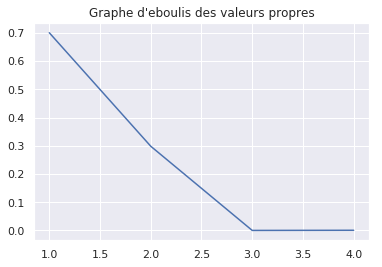

In [22]:
# Graphe d'éboulis des valeurs propres
sns.lineplot(1 + np.arange(p), part_inertie).set_title("Graphe d'eboulis des valeurs propres")

### Représentation des individus dans les nouveaux axes

La $d$-ème composante principal $ C^d = X u_d $ donne les coordonnées des n individus sur le $d$-ème axe principal.

In [93]:
C = np.dot(X,vecteur_principaux[:,:2]) # On garde les deux axes principaux
C1 = C[:,0]
C2 = C[:,1]

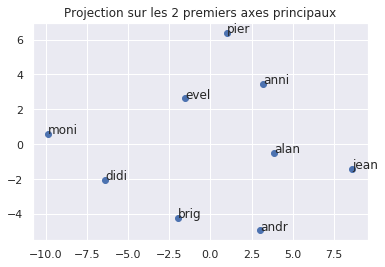

In [94]:
plt.title("Projection sur les 2 premiers axes principaux")
plt.scatter(C1, C2)
for i in range(n):
    plt.text(C1[i], C2[i], names[i], fontsize=12)

### Qualité de la représentation d’un individu 
Par exemple, sur le premier axe principal:
\begin{equation}
cos^2_{u1}(x_1) = \frac{(C^1_i)^2}{||x_i||^2}
\end{equation}

In [97]:
cos2 = np.square(C) / np.square(np.linalg.norm(X, axis = 1))[:,None] # Qualité de projection
# Proche de 1, la presentation sur le plan est assez bonne
Repres = pd.DataFrame()
Repres['Noms'] = names
Repres['Qualité_Axe1'] = cos2[:,0]
Repres['Qualité_Axe2'] = cos2[:,1]
Repres['Qualité_Plan'] = cos2.sum(axis = 1)
Repres

,Noms,Qualité_Axe1,Qualité_Axe2,Qualité_Plan
0,jean,0.973793,0.026080,0.999873
1,alan,0.983177,0.016483,0.999660
2,anni,0.461268,0.537359,0.998627
3,moni,0.996067,0.003689,0.999755
4,didi,0.906559,0.092513,0.999073
5,andr,0.275100,0.724172,0.999272
6,pier,0.025188,0.974147,0.999335
7,brig,0.177607,0.820425,0.998032
8,evel,0.252381,0.728387,0.980768


### Contribution d'un individu à un axe

Par exemple, sur le premier axe
\begin{equation}
CTB_{u1}(x_i) = \frac{(C^1_i)^2/n}{\lambda_1}
\end{equation}

In [100]:
ctb = np.square(C) / (n * lambd[:2])
Contrib = pd.DataFrame()
Contrib['Noms'] = names
Contrib['Contrib_Axe1'] = ctb[:,0]
Contrib['Contrib_Axe2'] = ctb[:,1]
Contrib

,Noms,Contrib_Axe1,Contrib_Axe2
0,jean,0.291867,0.018345
1,alan,0.059206,0.002330
2,anni,0.040635,0.111099
3,moni,0.381947,0.003319
4,didi,0.161519,0.038684
5,andr,0.036203,0.223665
6,pier,0.004138,0.375596
7,brig,0.015025,0.162887
8,evel,0.009460,0.064075


### Cercle de corrélations
On trace $(corr(C^1, x^j), corr(C^2, x^j))\;\;\forall j$

Text(0.5, 1.0, 'Cercle des corrélations')

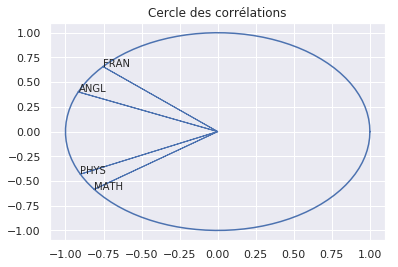

In [27]:
a = np.linspace(0,2*np.pi, 100)
plt.plot(np.cos(a), np.sin(a))
for i in range(p):
    xi = np.corrcoef(C1, X[:,i])[0,1]
    yi = np.corrcoef(C2, X[:,i])[0,1]
    plt.arrow(0,0,xi,yi, color = 'b')
    plt.text(xi, yi, features[i])
plt.title("Cercle des corrélations")

## ACP - Scikit Learn - Résumé

In [28]:
from sklearn import decomposition

data = pd.read_csv("~/Desktop/notes_ACP.txt", sep = " ")
X = preprocessing.StandardScaler(with_std=False).fit_transform(data)

n, p = data.shape
names = list(data.index)
features = list(data.columns)

pca = decomposition.PCA(n_components = p)
pca.fit(X)

for i in range(p):
    print("Part d'inertie expliquée par l'axe #{}: {}".format(i, pca.explained_variance_ratio_[i]))
    
C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

Part d'inertie expliquée par l'axe #0: 0.700466942857728
Part d'inertie expliquée par l'axe #1: 0.298460713757289
Part d'inertie expliquée par l'axe #2: 0.0008095537753097013
Part d'inertie expliquée par l'axe #3: 0.00026278960967340354


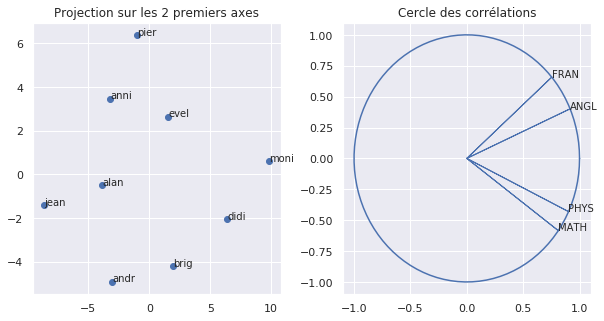

In [29]:
### Figures

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(C1, C2)
for i in range(n):
    plt.text(C1[i], C2[i], names[i])
plt.title("Projection sur les 2 premiers axes")
plt.subplot(122) 

a = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(a), np.sin(a))
for i in range(p):
    xi = np.corrcoef(C1, X[:,i])[0,1]
    yi = np.corrcoef(C2, X[:,i])[0,1]
    plt.arrow(0,0,xi,yi, color = 'b')
    plt.text(xi, yi, features[i])
plt.title("Cercle des corrélations")
plt.subplots_adjust( wspace = 0.25 )

# Quel est le but de l'ACP ?

On veut résumer au mieux l'information contenue dans le jeu de données afin de faciliter l'interpretation.

# Formules utiles:

## Matrice de variance-covariance des p variables

\begin{equation}
S = \begin{bmatrix}
s_1^2 & s_{12} & ... & s_{1p} \\
s_{21} & s_2^2 & ... & s_{2p} \\
... & ... & ... & ... \\
s_{p1} & s_{p2} & ... & s_p^2 
\end{bmatrix}
\end{equation}

\begin{equation}
S = \frac{1}{n} X^T X
\end{equation}


## Inertie

Elle représente la dispersion du nuage de points.
\begin{equation}
I_T = Tr(S)
\end{equation}

\begin{equation}
I_T = \lambda_1 + \lambda_2 + ... \lambda_p
\end{equation}

### Part d'inertie expliquée par chaque axe

\begin{equation}
\frac{\lambda_d}{I_t}
\end{equation}

### Représentation des individus dans les nouveaux axes

La $d$-ème composante principal $ C^d = X u_d $ donne les coordonnées des $n$ individus sur le $d$-ème axe principal.

### Qualité de la représentation d’un individu 
Par exemple, sur le premier axe principal:
\begin{equation}
cos^2_{u1}(x_1) = \frac{(C^1_i)^2}{||x_i||^2}
\end{equation}

Si la valeur est proche de $1$, on dit que la représentation dans le premier axe de l'individu $i$ est bonne.

### Contribution d'un individu à un axe
Par exemple, sur le premier axe principal:
\begin{equation}
CTB_{u1}(x_i) = \frac{(C^1_i)^2/n}{\lambda_1}
\end{equation}

Attention aux individus qui contribuent excessivement à l'axe.

### Cercle de corrélations
On trace $(corr(C^1, x^j), corr(C^2, x^j))\;\;\forall j$

La variable $x^j$ sera bien représentée dans le nouveau repère si elle est proche du cercle de corrélation.



## Liens utiles

D'après le cours de [Fanny Villers](https://www.lpsm.paris/pageperso/villers/)

[Notes de cours de Andrew Ng - Standford](http://cs229.stanford.edu/notes/cs229-notes10.pdf)

[Vidéos de cours de Andrew Ng - MOOC Coursera](https://www.youtube.com/watch?v=Zbr5hyJNGCs&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=81)

Python: [scikit-learn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) - [prince PCA](https://github.com/MaxHalford/prince#principal-component-analysis-pca)

R: [FactoMineR](http://factominer.free.fr/factomethods/analyse-en-composantes-principales.html)